## Домашняя работа по эпидемиологическим моделям в графах (часть 1)

Срок выполнения: 1 неделя

Баллы за данную часть составляеют 40% от баллов за все домашнее задание. 

Цель данной части: познакомиться на практике с инструмен тами моделирования эпидемии на графах.

Предлагаемые инструменты: 
- NetworkX
- SEIRS+  https://github.com/ryansmcgee/seirsplus/wiki

### Задание 

**1) Генерация графа и запуск модели SEIR (10%)**
- Сгенерировать граф на 10 000 вершин типа barabasi_albert_graph
- Запустить на данном графе SEIR с параметрами:
    - SIGMA  = 1/5.2 
    - GAMMA  = 1/10 
    - MU_I   = 0.002
    - R0     = 2.5
    - BETA   = 1/(1/GAMMA) * R0
    - initI   = numNodes/100
- Сравнить течение смоделированного процесса с течением процесса в неграфовой модели с аналогичными параметрами.

In [136]:
!pip install --upgrade networkx seirsplus

Requirement already up-to-date: networkx in /usr/local/lib/python3.6/dist-packages (2.5)
Requirement already up-to-date: seirsplus in /usr/local/lib/python3.6/dist-packages (1.0.9)


In [137]:
import matplotlib.pyplot as mplt
import networkx as nx


In [138]:
from networkx.generators.random_graphs import barabasi_albert_graph

In [139]:
numNodes = 1000

In [140]:
n=numNodes
m=9
G=barabasi_albert_graph(n, m, seed=None)

In [141]:
from seirsplus.models import *
from seirsplus.networks import *
import networkx as nx
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt 
import time

In [142]:
SIGMA = 1/5.2
GAMMA = 1/10
MU_I = 0.002
R0 = 2.5
BETA = 1/(1/GAMMA) * R0
initI = numNodes/100


In [143]:
model = SEIRSNetworkModel(G=G, beta=BETA, sigma=SIGMA, gamma=GAMMA, initI=initI, mu_I = MU_I)

In [144]:
running = model.run(T=100)

t = 0.12
t = 10.07
t = 20.06
t = 30.02
t = 40.07
t = 50.03
t = 60.09
t = 70.00
t = 80.02
t = 90.02
t = 100.08


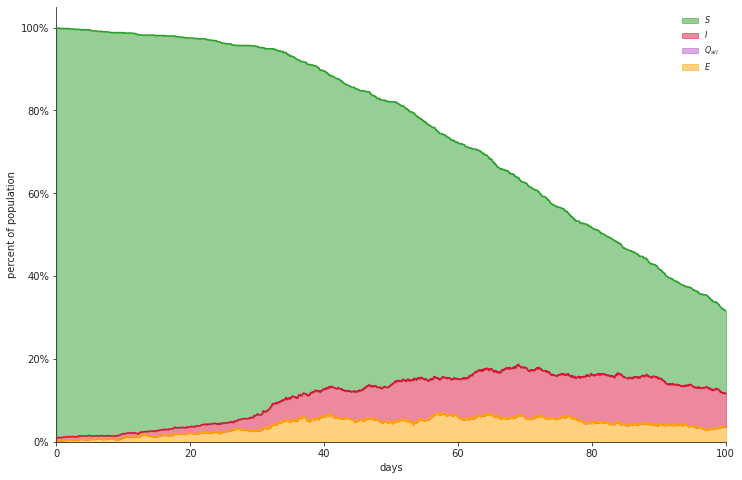

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0c9f081e48>)

In [145]:
model.figure_infections(plot_S='stacked',plot_E='stacked',plot_I='stacked')

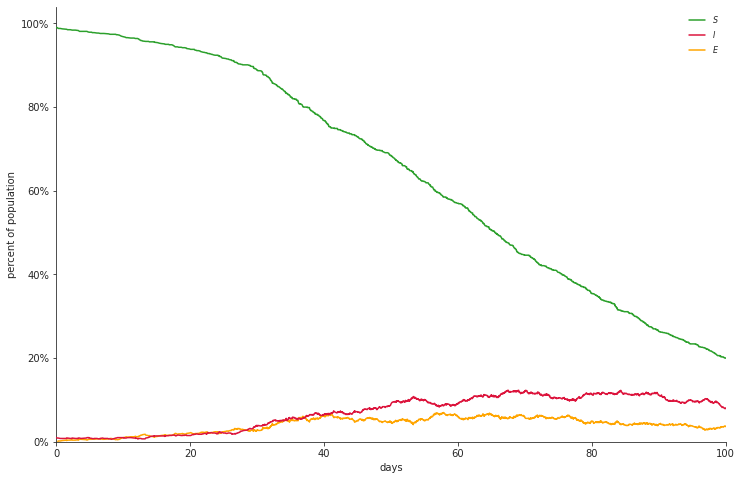

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0ca17aaf98>)

In [146]:
model.figure_basic()

In [147]:
model_without_graph = SEIRSModel(initN=numNodes, beta=BETA, sigma=SIGMA, gamma=GAMMA, initI=initI, mu_I = MU_I)

In [148]:
running = model_without_graph.run(T=100)

t = 99.90


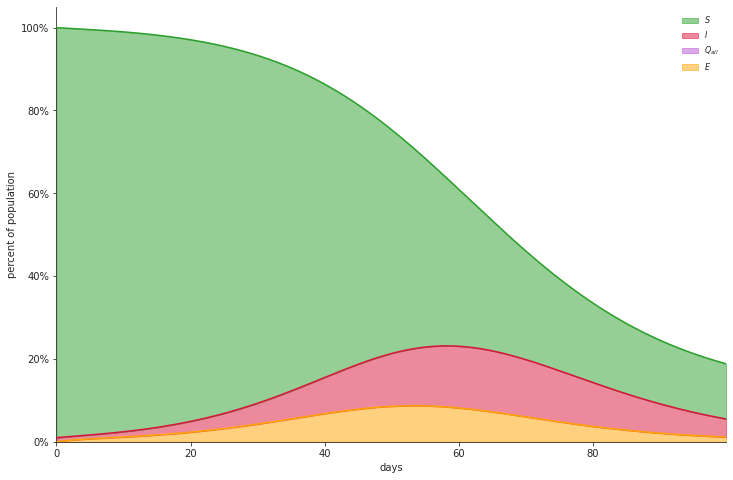

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0c9fc3bc50>)

In [149]:
model_without_graph.figure_infections(plot_S='stacked',plot_E='stacked',plot_I='stacked')

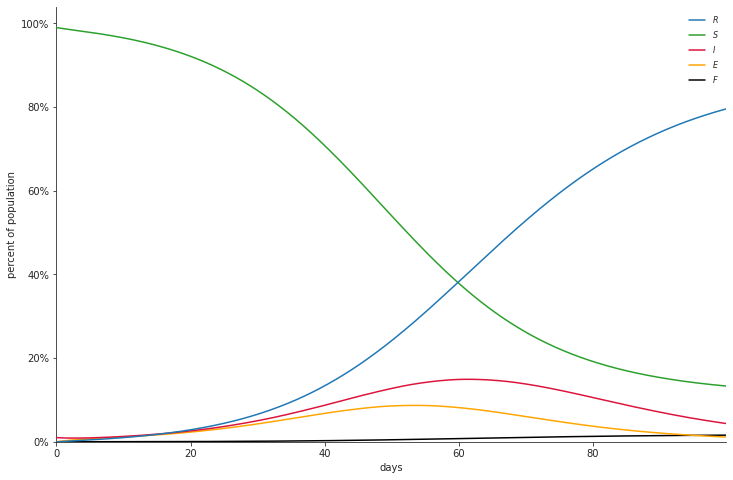

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0ca120f208>)

In [150]:
model_without_graph.figure_basic()

Результат получился практически одинаковым, в безграфовой модели графики выглядят более плавными, а в графовой более похожий на реальные графики

**2) Моделирование карантинных мер (10%)**
- Смоделируйте карантинные меры при помощи custom_exponential_graph
- Сравните течение процесса с карантинными мерами и без

In [151]:
G_quarantine = custom_exponential_graph(G, scale=10)

In [152]:
checkpoints = {'t':       [40], 
               'G':       [G_quarantine]
}

In [153]:
model_with_quarantine = SEIRSNetworkModel(G=G, beta=BETA, sigma=SIGMA, gamma=GAMMA, initI=initI, mu_I = MU_I)

In [154]:
model_with_quarantine.run(T=100, checkpoints=checkpoints)

t = 0.98
t = 10.11
t = 20.13
t = 30.10
[Checkpoint: Updating parameters]
t = 40.02
t = 50.29
t = 60.01
t = 70.02
t = 80.01
t = 90.09
t = 100.02


True

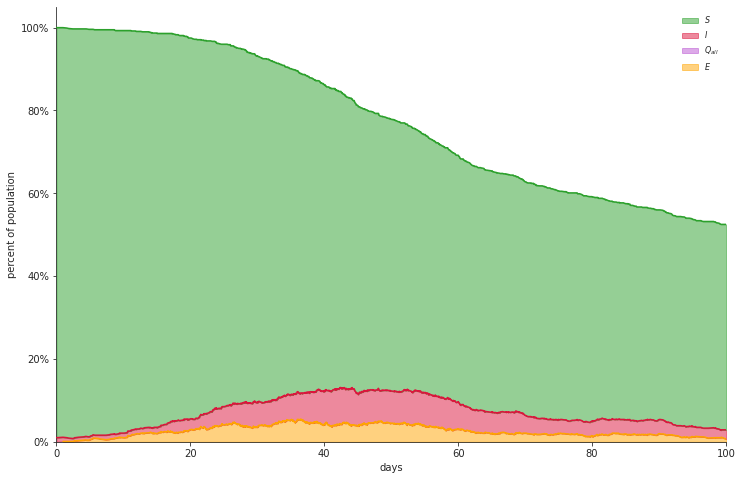

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0ca1115cf8>)

In [155]:
model_with_quarantine.figure_infections(plot_S='stacked',plot_E='stacked',plot_I='stacked')

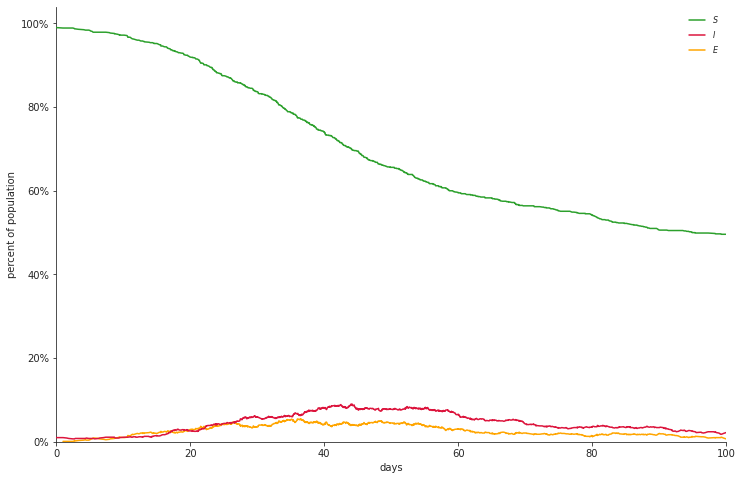

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0ca1170438>)

In [156]:
model_with_quarantine.figure_basic()

Карантинные меры сильно снижают заболеваемость

**3) Индивидуальные карантинные меры и центральность (20%)**
- Рассмотрим следующие меры по предотвращению эпидемии: раз в заданное количество итераций мы проверяем состояние 0,5% самых значимых вершин. Если оказывается, что они больны, изолируем их. В качестве меры "значимости" используйте следующие центральности: degree_centrality, betweenness_centrality и 2 другие из реализованных в NetworkX на Ваш выбор.
- Сравнить течение процессов при использовании различных центральностей. Какая оказалась наиболее удачной для оценки рисков?

In [157]:
import copy

In [158]:
def run_with_centr(model, f_centr):
  NumIter=2500
  centr = f_centr(model.G)
  centr_t = copy.deepcopy(centr)
  for i in tqdm(range(NumIter)):
    running = model.run_iteration()
    if i % 10 == 0:
      count = int(len(centr) * 0.005)
      max_node_list = []
      j = 0 
      while j < count:
        max_node = max(centr, key=centr.get)
        if model.X[max_node][0] != 7:
          if model.X[max_node][0] == 3:
            print(max_node)
            model.set_isolation(max_node, isolate=True)
          j += 1
        centr.pop(max_node)
      centr = copy.deepcopy(centr_t)   

In [159]:
G_bet = copy.deepcopy(G)
model_bet_centr = SEIRSNetworkModel(G=G_bet, beta=BETA, sigma=SIGMA, gamma=GAMMA, initI=initI, mu_I = MU_I)

In [160]:
run_with_centr(model_bet_centr, nx.betweenness_centrality)

2
2
11
10
12
9
2
11



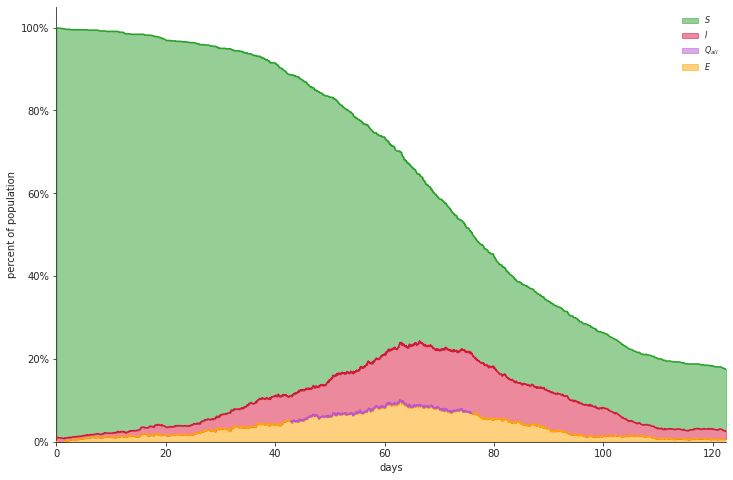

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0ca0fab5f8>)

In [161]:
model_bet_centr.figure_infections(plot_S='stacked',plot_E='stacked',plot_I='stacked')

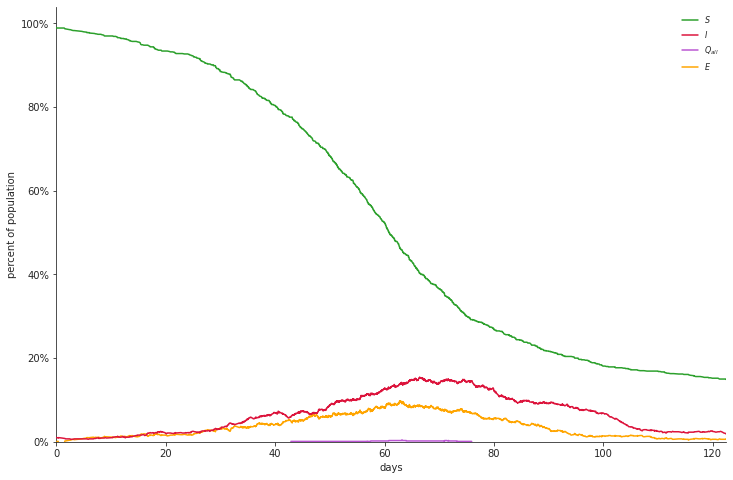

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0c9ef829e8>)

In [162]:
model_bet_centr.figure_basic()

In [163]:
G_deg = copy.deepcopy(G)
model_deg_centr = SEIRSNetworkModel(G=G_deg, beta=BETA, sigma=SIGMA, gamma=GAMMA, initI=initI, mu_I = MU_I)

In [164]:
run_with_centr(model_deg_centr, nx.degree_centrality)

9
2
10
9
2
12
2
11
8
12
11



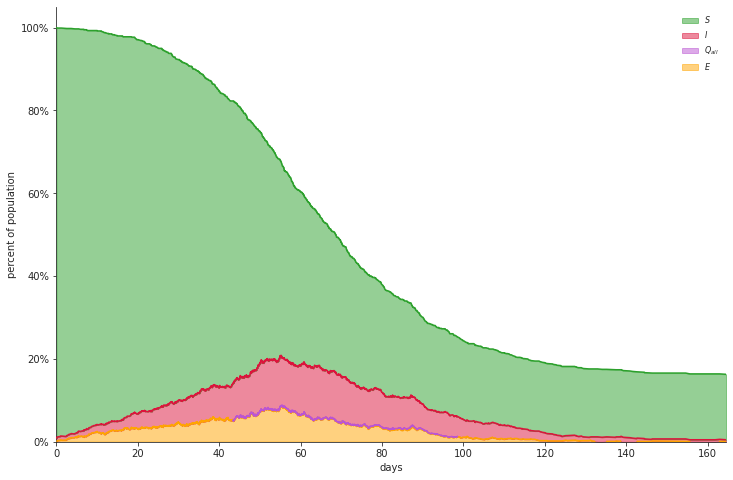

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0c9f8d5208>)

In [165]:
model_deg_centr.figure_infections(plot_S='stacked',plot_E='stacked',plot_I='stacked')

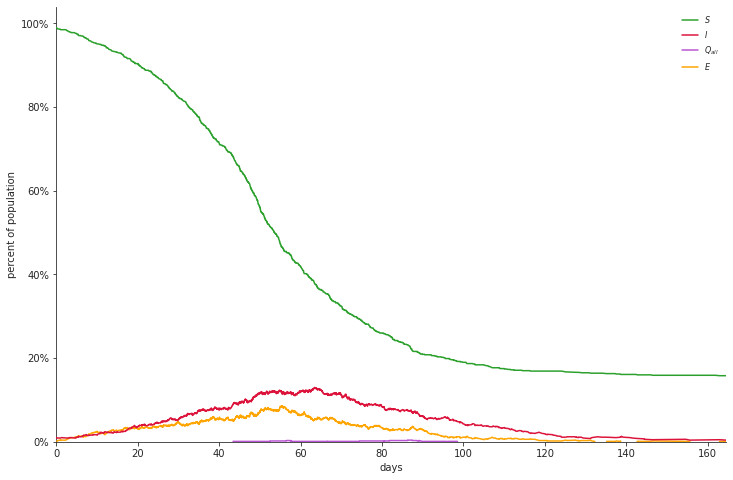

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0c9fb7d710>)

In [166]:
model_deg_centr.figure_basic()

In [167]:
G_harm = copy.deepcopy(G)
model_harm_centr = SEIRSNetworkModel(G=G_harm, beta=BETA, sigma=SIGMA, gamma=GAMMA, initI=initI, mu_I = MU_I)

In [168]:
run_with_centr(model_harm_centr, nx.harmonic_centrality)

12
11
2
14



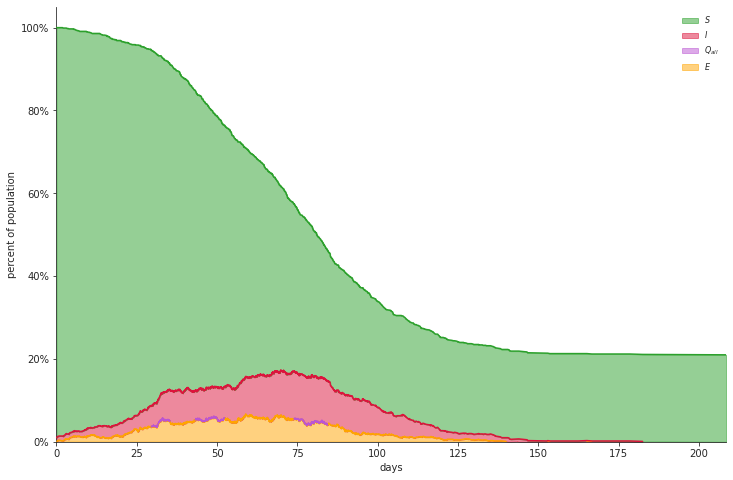

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0c9f60e5c0>)

In [169]:
model_harm_centr.figure_infections(plot_S='stacked',plot_E='stacked',plot_I='stacked')

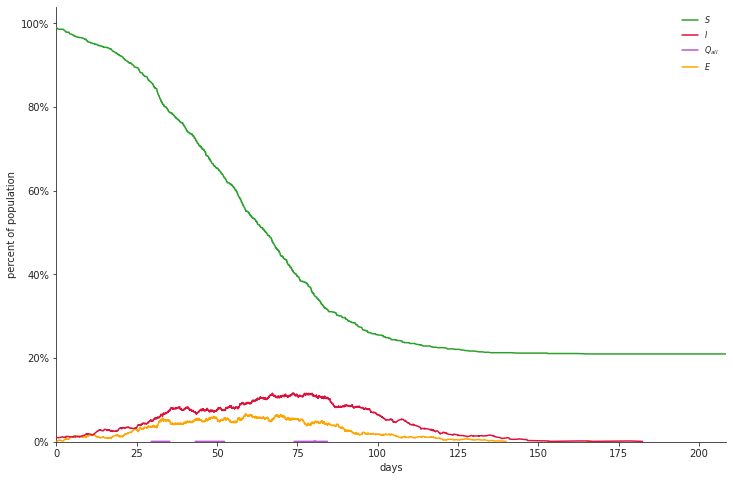

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0c9faea208>)

In [170]:
model_harm_centr.figure_basic()

In [171]:
G_eig = copy.deepcopy(G)
model_eig_centr = SEIRSNetworkModel(G=G_eig, beta=BETA, sigma=SIGMA, gamma=GAMMA, initI=initI, mu_I = MU_I)

In [172]:
run_with_centr(model_eig_centr, nx.eigenvector_centrality)

12
10
12
11
14



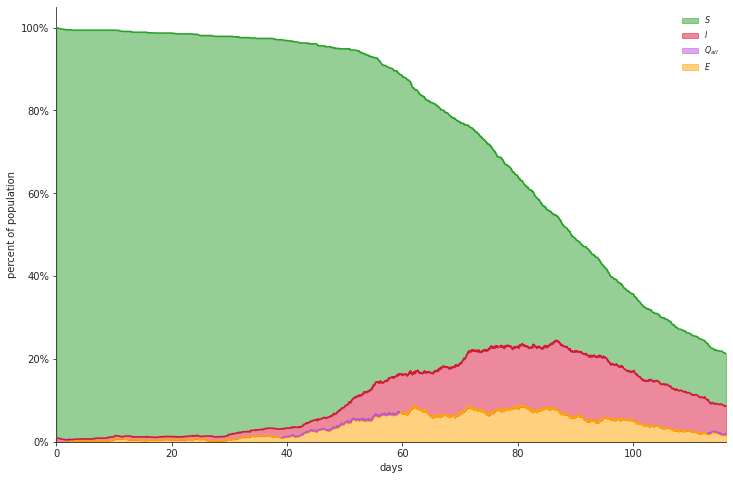

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0c9ec61ef0>)

In [173]:
model_eig_centr.figure_infections(plot_S='stacked',plot_E='stacked',plot_I='stacked')

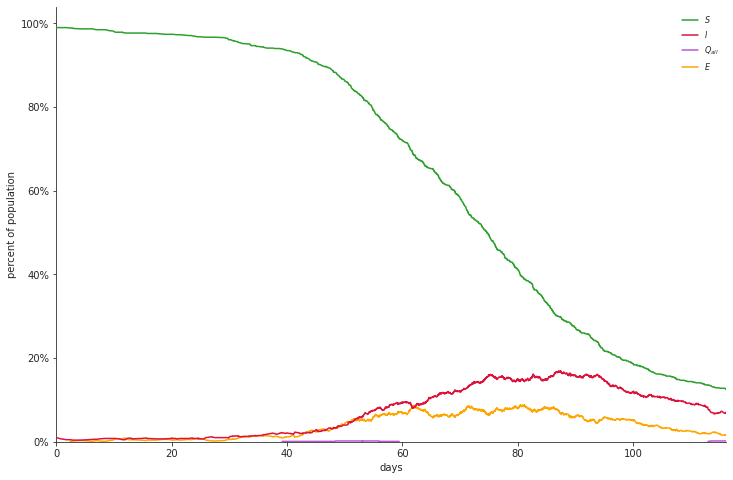

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0ca00d7e80>)

In [174]:
model_eig_centr.figure_basic()

Наилучший результат показала eigenvector_centrality



**4)(Бонус) Записать систему уравнений для модели SEIRS на графе в поточеченом приближении среднего поля. (5%)**